# Setting up working directory

In [196]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [197]:
import os
root_directory = "/content/drive/My Drive/"
project_folder = "Colab Notebooks/Bangla_Sentiment_Analysis/"

# create and set working directory
def create_and_set_working_directory(project_folder):
	if os.path.isdir(root_directory + project_folder) == False:
		os.mkdir(root_directory + project_folder)
		print(root_directory + project_folder + "didn't exist and so created")
	
	# changing the OS path to project folder as working directory
	os.chdir(root_directory + project_folder)


In [198]:
create_and_set_working_directory(project_folder)

# Loading main dataset

In [199]:
import pandas as pd

dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/bangla_news_comments_12000.csv")

In [200]:
path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/dataframe_main.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  dataframe.to_csv(f)

In [201]:
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/dataframe_main.csv")
dataframe.head()

,Unnamed: 0,Unnamed: 0.1,Comment,Tag
0,0,0,লিখার সময় পারলে সত্য you piece of !@##$it লিখা...,Negative
1,1,1,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,Negative
2,2,2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,Very Negative
3,3,3,চুরি নয় লুটপাট 25।,Very Negative
4,4,4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,Neutral


# Analyzing dataset

In [202]:
import numpy as np
import matplotlib.pyplot as plt

def draw_bar_graph(values, freq, color, x_label, y_label, title):
  fig = plt.figure(figsize = (10, 5))

  # creating the bar plot
  plt.bar(values, freq, color =color, width = 0.4)
 
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()

In [203]:
def analyze_dataset(df, target):
  print(f'Shape: {df.shape}')
  print("")

  target_info = df[target].value_counts()
  print(f'Target class info:\n{target_info}')
  print("")

  data = target_info.to_dict()

  class_values = list(data.keys())
  class_value_freq = list(data.values())

  draw_bar_graph(class_values, class_value_freq, 'blue', 'sentiment type', 'frequency', 'target analysis')
  

Shape: (1779, 4)

Target class info:
Negative         524
Very Negative    393
Neutral          304
Very Positive    286
Positive         272
Name: Tag, dtype: int64



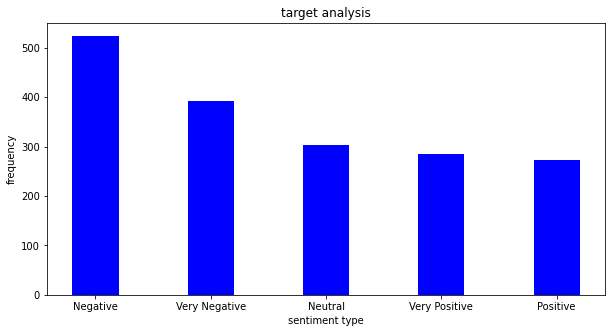

In [204]:
analyze_dataset(dataframe, 'Tag')

**?? Looks a bit imbalanced. Balancing could be done based on accuracy scores** 

# Dividing main dataset into smaller parts

In [ ]:
sub_dataframe = dataframe.iloc[0:118, :]
reserved_portion = dataframe.drop(dataframe.index[0:118])

for i in range(15):
  
  path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/sub_dataset_' + str(i) + '.csv'

  with open(path, 'w', encoding = 'utf-8-sig') as f:
    sub_dataframe.to_csv(f)

  print(f'part {i}: sub dataset size: {sub_dataframe.shape}')
  print(f'part {i}: remaining dataset size: {reserved_portion.shape}')
  print("")

  sub_dataframe = reserved_portion.iloc[0:118, :] 
  reserved_portion.drop(reserved_portion.index[0:118], inplace=True)
  

path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/sub_dataset_15.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  sub_dataframe.to_csv(f)

part 0: sub dataset size: (118, 4)
part 0: remaining dataset size: (1661, 4)

part 1: sub dataset size: (118, 4)
part 1: remaining dataset size: (1543, 4)

part 2: sub dataset size: (118, 4)
part 2: remaining dataset size: (1425, 4)

part 3: sub dataset size: (118, 4)
part 3: remaining dataset size: (1307, 4)

part 4: sub dataset size: (118, 4)
part 4: remaining dataset size: (1189, 4)

part 5: sub dataset size: (118, 4)
part 5: remaining dataset size: (1071, 4)

part 6: sub dataset size: (118, 4)
part 6: remaining dataset size: (953, 4)

part 7: sub dataset size: (118, 4)
part 7: remaining dataset size: (835, 4)

part 8: sub dataset size: (118, 4)
part 8: remaining dataset size: (717, 4)

part 9: sub dataset size: (118, 4)
part 9: remaining dataset size: (599, 4)

part 10: sub dataset size: (118, 4)
part 10: remaining dataset size: (481, 4)

part 11: sub dataset size: (118, 4)
part 11: remaining dataset size: (363, 4)

part 12: sub dataset size: (118, 4)
part 12: remaining dataset siz

# Basic preprocessing

In [205]:
pip install bltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [206]:
!pip install git+https://github.com/banglakit/bengali-stemmer.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/banglakit/bengali-stemmer.git to /tmp/pip-req-build-jhe27yxy
  Running command git clone -q https://github.com/banglakit/bengali-stemmer.git /tmp/pip-req-build-jhe27yxy


In [207]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [208]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/Bangla_Sentiment_Analysis/bn_nlp /content

In [209]:
from emoji import demojize
import re
import string
from bltk.langtools.banglachars import (operators, punctuations, others, digits)

from bn_nlp.Stemmer import stemmerOP
from bengali_stemmer.rafikamal2014 import RafiStemmer

from bn_nlp.preprocessing import ban_processing

def process_text(txt):
  # converting emojis to text
  # words are separated by UNDERSCORE '_'
  txt = demojize(txt, delimiters=(" ", " "))

  # removing url from text
  url_regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
  txt = re.sub(url_regex, '', txt)

  # removing english special characters expect '_'
  string.punctuation = string.punctuation.replace('_', '')
  txt = txt.translate(str.maketrans('', '', string.punctuation))

  # removing bengali special characters
  bangla_special_characters = '"‘`'

  for x in operators:
    bangla_special_characters += x

  for x in punctuations:
    if x == '_':
      continue
    bangla_special_characters += x

  for x in others:
    if x == '্':
      continue
    bangla_special_characters += x

  # print(f"Bangla special characters: {bangla_special_characters}")
  # print("")

  txt = txt.translate(str.maketrans('', '', bangla_special_characters))

  # removing english numeric characters
  remove_digits = str.maketrans('', '', string.digits)
  txt = txt.translate(remove_digits)

  # removing bangla numeric characters
  bangla_digits = ""
  for x in digits:
      bangla_digits += x

  remove_bangla_digits = str.maketrans('', '', bangla_digits)
  txt = txt.translate(remove_bangla_digits)

  # changing the case of english words
  txt = txt.lower()

  # removing extra SPACES in the text
  txt = re.sub(' +', ' ', txt).strip()

  # stemming bangla words
  stemmer = RafiStemmer()
  txt = stemmer.stem_word(txt)
  
  stemmer = stemmerOP()
  txt = stemmer.stem(txt)

  # normalizing bangla words and removing bangla stopwords from the comment
  bp = ban_processing()
  
  # normalization: অসহনীয় ভারী বর্ষণে to অসহনিয় ভারি বর্ষনে
  txt = bp.word_normalize(txt)
  txt = bp.stop_word_remove(txt)

  return txt


In [210]:
text = '"এই খবর এ আমাগো কি? 🤬🤬 https://machinelearningmastery.com/clean-text-machine-learning-python/"'
print(f'actual text: {text}')
text = process_text(text)
print(f'processed text: {text}')
print("")

text = "লিখার সময় পারলে `সত্য` yOu piece of !@##$ik লিখার অভ্যাস শিখুন।"
print(f'actual text: {text}')
text = process_text(text)
print(f'processed text: {text}')
print("")

text = "এরা যেখানেই (YA'LL should go to HElL...), dogs! যাবে সেখানেই চুরি হবে।"
print(f'actual text: {text}')
text = process_text(text)
print(f'processed text: {text}')
print("")

text = "  নড়াচড়া নাকি   ডানবাম?203"
print(f'actual text: {text}')
text = process_text(text)
print(f'processed text: {text}')
print("")

text = "'২০০৩/৪/৫এর দিকে মিনিকেট কিনতাম ২০/২২ টাকায় তখন আমার বেতন ছিল ৭০০০টাকা।' এখন পাই ৬০,০০০টাকা কিন্তু চাল কিনি ৫০/৫৫টাকার ভেতর!"
print(f'actual text: {text}')
text = process_text(text)
print(f'processed text: {text}')
print("")

text = "যে দেশে ১৬ ই  ডিসেম্বর তারিখেও ডিউটি করতে হয় , সেখানে এমন হওয়া খারাপ কিছু না ।"
print(f'actual text: {text}')
text = process_text(text)
print(f'processed text: {text}')
print("")

text = "সড়কের ভোগান্তিতে    পড়েন  নগরবাসী"
print(f'actual text: {text}')
text = process_text(text)
print(f'processed text: {text}')
print("")

text = "অসহনীয় ভারী বর্ষণে"
print(f'actual text: {text}')
text = process_text(text)
print(f'processed text: {text}')
print("")

text = "করিম কাজটি করছে"
print(f'actual text: {text}')
text = process_text(text)
print(f'processed text: {text}')
print("")

text = "সড়কের12A'--,.:Bকারণে"
print(f'actual text: {text}')
text = process_text(text)
print(f'processed text: {text}')
print("")


actual text: "এই খবর এ আমাগো কি? 🤬🤬 https://machinelearningmastery.com/clean-text-machine-learning-python/"
processed text: খবর আমাগো face_with_symbols_on_mouth face_with_symbols_on_mouth

actual text: লিখার সময় পারলে `সত্য` yOu piece of !@##$ik লিখার অভ্যাস শিখুন।
processed text: লিখার সময় পারলে সত্য you piece of ik লিখার অভ্যাস শিখুন

actual text: এরা যেখানেই (YA'LL should go to HElL...), dogs! যাবে সেখানেই চুরি হবে।
processed text: যেখানেই yall should go to hell dogs সেখানেই চুরি হব

actual text:   নড়াচড়া নাকি   ডানবাম?203
processed text: নড়াচড়া ডানবাম

actual text: '২০০৩/৪/৫এর দিকে মিনিকেট কিনতাম ২০/২২ টাকায় তখন আমার বেতন ছিল ৭০০০টাকা।' এখন পাই ৬০,০০০টাকা কিন্তু চাল কিনি ৫০/৫৫টাকার ভেতর!
processed text: মিনিকেট কিনতাম টাকায় বেতন টাকা পাই টাকা চাল কিনি টাকার ভেতর

actual text: যে দেশে ১৬ ই  ডিসেম্বর তারিখেও ডিউটি করতে হয় , সেখানে এমন হওয়া খারাপ কিছু না ।
processed text: দেশে ডিসেম্বর তারিখেও ডিউটি হওয়া খারাপ

actual text: সড়কের ভোগান্তিতে    পড়েন  নগরবাসী
processed text: সড়কের ভোগান

In [211]:
def process_feature(df, feat):

  for index, row in df.iterrows():
    text = row[feat]
    processed_text = process_text(text)

    df.at[index, "Comment"] = processed_text

  return df

# Skip it - Generating processed sub datasets 



00.

In [ ]:
sub_dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/sub_dataset_0.csv")
processed_dataframe = process_feature(sub_dataframe, 'Comment')

path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/processed_dataset_0.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  processed_dataframe.to_csv(f)


01.

In [ ]:
sub_dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/sub_dataset_1.csv")
processed_dataframe = process_feature(sub_dataframe, 'Comment')

path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/processed_dataset_1.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  processed_dataframe.to_csv(f)


02.

In [ ]:
sub_dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/sub_dataset_2.csv")
processed_dataframe = process_feature(sub_dataframe, 'Comment')

path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/processed_dataset_2.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  processed_dataframe.to_csv(f)


03.

In [ ]:
sub_dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/sub_dataset_3.csv")
processed_dataframe = process_feature(sub_dataframe, 'Comment')

path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/processed_dataset_3.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  processed_dataframe.to_csv(f)


04.

In [ ]:
sub_dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/sub_dataset_4.csv")
processed_dataframe = process_feature(sub_dataframe, 'Comment')

path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/processed_dataset_4.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  processed_dataframe.to_csv(f)


05.

In [ ]:
sub_dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/sub_dataset_5.csv")
processed_dataframe = process_feature(sub_dataframe, 'Comment')

path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/processed_dataset_5.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  processed_dataframe.to_csv(f)


06.

In [ ]:
sub_dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/sub_dataset_6.csv")
processed_dataframe = process_feature(sub_dataframe, 'Comment')

path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/processed_dataset_6.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  processed_dataframe.to_csv(f)


07.

In [ ]:
sub_dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/sub_dataset_7.csv")
processed_dataframe = process_feature(sub_dataframe, 'Comment')

path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/processed_dataset_7.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  processed_dataframe.to_csv(f)


08.

In [ ]:
sub_dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/sub_dataset_8.csv")
processed_dataframe = process_feature(sub_dataframe, 'Comment')

path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/processed_dataset_8.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  processed_dataframe.to_csv(f)


09.

In [ ]:
sub_dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/sub_dataset_9.csv")
processed_dataframe = process_feature(sub_dataframe, 'Comment')

path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/processed_dataset_9.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  processed_dataframe.to_csv(f)


10.

In [ ]:
sub_dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/sub_dataset_10.csv")
processed_dataframe = process_feature(sub_dataframe, 'Comment')

path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/processed_dataset_10.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  processed_dataframe.to_csv(f)


11.

In [ ]:
sub_dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/sub_dataset_11.csv")
processed_dataframe = process_feature(sub_dataframe, 'Comment')

path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/processed_dataset_11.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  processed_dataframe.to_csv(f)


12.

In [ ]:
sub_dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/sub_dataset_12.csv")
processed_dataframe = process_feature(sub_dataframe, 'Comment')

path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/processed_dataset_12.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  processed_dataframe.to_csv(f)


13.

In [ ]:
sub_dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/sub_dataset_13.csv")
processed_dataframe = process_feature(sub_dataframe, 'Comment')

path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/processed_dataset_13.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  processed_dataframe.to_csv(f)


14.

In [ ]:
sub_dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/sub_dataset_14.csv")
processed_dataframe = process_feature(sub_dataframe, 'Comment')

path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/processed_dataset_14.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  processed_dataframe.to_csv(f)


15.

In [ ]:
sub_dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/sub_dataset_15.csv")
processed_dataframe = process_feature(sub_dataframe, 'Comment')

path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/processed_dataset_15.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  processed_dataframe.to_csv(f)


# Start from here --> Merging all sub dataset into one main dataset

In [214]:
dataframes = []
for i in range(15):
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/processed_dataset_' + str(i) + '.csv')
  dataframes.append(df)

dataframe_processed = pd.concat(dataframes)
dataframe_processed.drop(dataframe_processed.columns[[1, 2, 5]], axis = 1, inplace = True)
dataframe_processed.index = range(dataframe_processed.shape[0])

dataframe_processed.shape

(1770, 3)

In [215]:
dataframe_processed.head()

,Unnamed: 0,Comment,Tag
0,0,লিখার সময় পারলে সত্য you piece of it লিখার অভ্...,Negative
1,1,সংশ্লিষ্ট সকলের ডিপ্রেশনের সরকার মনোনিত পরিচাল...,Negative
2,2,দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে বাধাগ্রস...,Very Negative
3,3,চুরি লুটপাট,Very Negative
4,4,ইসলামি ব্যাংকের বর্তমান অবস্থা শাসক জামাতের সা...,Neutral


# Data cleaning

In [216]:
def clean_dataset(df):
  # Removing duplicated comments
  total_duplicate_comments = df.duplicated().sum()

  if total_duplicate_comments != 0:
      # Dropping duplicated entry keeping the first one. (default: keep='first')
      df.drop_duplicates(inplace=True)
  else:
      print("no duplicated entry found!")
      pass

  # Detecting and removing entries with missing values
  total_entries_with_missing_values = df.isnull().any(axis=1).sum()

  if total_entries_with_missing_values != 0:
      # Dropping the entries with at least missing values
      df.dropna(inplace=True)
  else:
      print("no entry with missing value found!")
      pass

  return df

In [217]:
dataframe_processed = clean_dataset(dataframe_processed)

no duplicated entry found!
no entry with missing value found!


# Target value encoding & decoding



Encode

In [ ]:
def encode_target_values(df, target):
  target_value_encode_dict = {
    "Very Positive": 2,
    "Positive": 1,
    "Neutral": 0,
    "Negative": -1,
    "Very Negative": -2
  }

  for index, row in df.iterrows():     
    sentiment = row[target]
    df.at[index, target] = target_value_encode_dict[sentiment]

  return df

In [ ]:
dataframe_processed = encode_target_values(dataframe_processed, 'Tag')
dataframe_processed.head(10)

,Unnamed: 0,Comment,Tag
0,0,লিখার সময় পারলে সত্য you piece of it লিখার অভ্...,-1
1,1,সংশ্লিষ্ট সকলের ডিপ্রেশনের সরকার মনোনিত পরিচাল...,-1
2,2,দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে বাধাগ্রস...,-2
3,3,চুরি লুটপাট,-2
4,4,ইসলামি ব্যাংকের বর্তমান অবস্থা শাসক জামাতের সা...,0
5,5,একটা ভাল প্রতিষ্ঠান কিভাবে লুট হয়ে যাচেছ angry...,-2
6,6,সরকার ব্যাংকে নিয়গ দিয়েছে ব্যাংকিং ব জানে face...,-2
7,7,পুরোপুরি আওয়ামিকরন অসতিতই থাকবেক,-1
8,8,এককথায় ব্যাংকটিতে ডাকাতি হয়েছে থাকব,-1
9,9,ইসলামি ব্যাংক প্রারম্ভ গ্রাহকদের পছন্দের ব্যাং...,-1


Decode

In [ ]:
def decode_target_values(df, target):
  target_value_decode_dict = {
    2 : "Very Positive",
    1 : "Positive",
    0 : "Neutral",
    -1 : "Negative",
    -2 : "Very Negative"
  }
  target_value_decode_list = []

  for index, row in df.iterrows():     
    sentiment = row[target]
    df.at[index, target] = target_value_decode_dict[sentiment]

  return df

In [ ]:
dataframe_processed = decode_target_values(dataframe_processed, 'Tag')
dataframe_processed.head(10)

,Unnamed: 0,Comment,Tag
0,0,লিখার সময় পারলে সত্য you piece of it লিখার অভ্...,Negative
1,1,সংশ্লিষ্ট সকলের ডিপ্রেশনের সরকার মনোনিত পরিচাল...,Negative
2,2,দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে বাধাগ্রস...,Very Negative
3,3,চুরি লুটপাট,Very Negative
4,4,ইসলামি ব্যাংকের বর্তমান অবস্থা শাসক জামাতের সা...,Neutral
5,5,একটা ভাল প্রতিষ্ঠান কিভাবে লুট হয়ে যাচেছ angry...,Very Negative
6,6,সরকার ব্যাংকে নিয়গ দিয়েছে ব্যাংকিং ব জানে face...,Very Negative
7,7,পুরোপুরি আওয়ামিকরন অসতিতই থাকবেক,Negative
8,8,এককথায় ব্যাংকটিতে ডাকাতি হয়েছে থাকব,Negative
9,9,ইসলামি ব্যাংক প্রারম্ভ গ্রাহকদের পছন্দের ব্যাং...,Negative


store file to drive

In [ ]:
y = len(dataframe_processed)

for i in range(y):
  dataframe_processed.iloc[i, 0] = i

path = '/content/drive/MyDrive/Colab Notebooks/Bangla_Sentiment_Analysis/dataframe_processed.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  dataframe_processed.to_csv(f)


# Analyze processed dataframe

Shape: (1770, 3)

Target class info:
Negative         521
Very Negative    389
Neutral          303
Very Positive    285
Positive         272
Name: Tag, dtype: int64



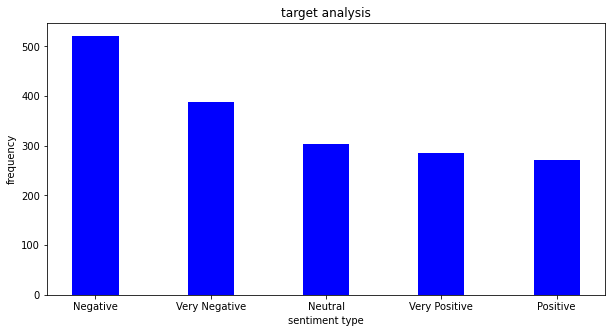

In [218]:
analyze_dataset(dataframe_processed, 'Tag')

In [219]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def draw_line_graph(f_lsts, f_labels, x_label, y_label, title, lgnd_txt):
  color_set = ['blue', 'green', 'red', 'black']
  color = []
  figure(figsize=(15, 7), dpi=80)

  # x = np.arange(x_val)
  for i in range(len(f_lsts)):
    plt.plot(np.array(f_lsts[i]), label=f_labels[i], marker='*')

  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)

  plt.legend(lgnd_txt)
  plt.show()

In [220]:
text_len_list = []
processed_text_len_list = []

count = 0
l = dataframe_processed.shape[0]

for i in range(l):
  if 200 <= i <= 350:
    text  = dataframe.loc[i , 'Comment']
    text_len = len(text)
    text_len_list.append(text_len)

    processed_text = dataframe_processed.loc[i , 'Comment']
    processed_text_len = len(processed_text)
    processed_text_len_list.append(processed_text_len)

    if processed_text_len > text_len:
      print(count)
      print(f'raw: {text_len}')    
      print(f'processed: {processed_text_len}')  
    
      print("")

  count = count + 1

lsts = [text_len_list, processed_text_len_list]
labels = ['text size', 'processed text size']
legend = ['original text', 'processed text']

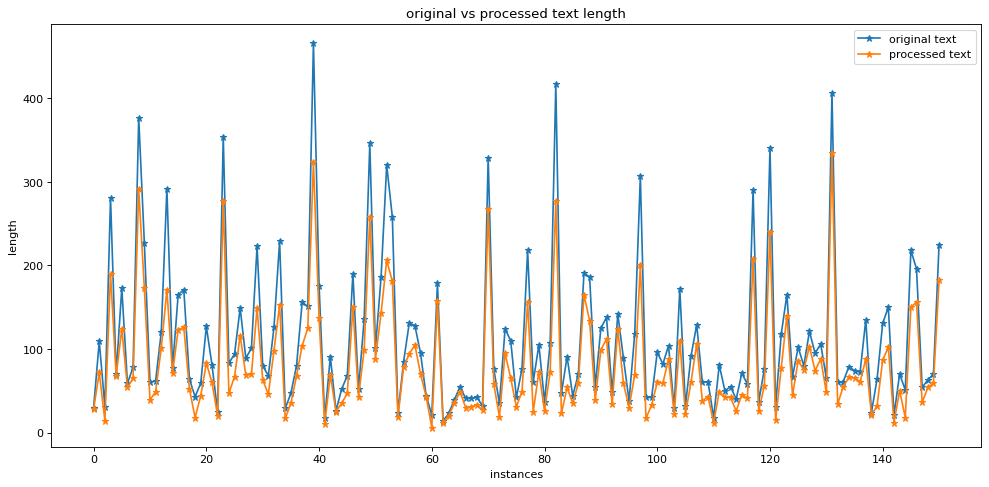

In [221]:
draw_line_graph(lsts, labels, 'instances', 'length', 'original vs processed text length', legend)

# Pattern Recognition process starts from here




Machine Learning based models

In [303]:
df = dataframe_processed

feature = df['Comment']
target = df['Tag']

In [304]:
feature

0       লিখার সময় পারলে সত্য you piece of it লিখার অভ্...
1       সংশ্লিষ্ট সকলের ডিপ্রেশনের সরকার মনোনিত পরিচাল...
2       দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে বাধাগ্রস...
3                                             চুরি লুটপাট
4       ইসলামি ব্যাংকের বর্তমান অবস্থা শাসক জামাতের সা...
                              ...                        
1765                  হিসেব কেবল পুলিশের জন্যই ব্যাংক দরক
1766                                  চুরি বড় গলায় কথা বল
1767              অনিয়ম দুর্নিতির প্রমান নিশ্চিত গ্রেফতার
1768                 সুনিয়ন্ত্রিত লুন্ঠন লুটপাট আওয়াশ চলব
1769    দেশের লুটপাটকারিদের সাজা অপসারন লুটপাটকারিরা ল...
Name: Comment, Length: 1770, dtype: object

In [305]:
target

0            Negative
1            Negative
2       Very Negative
3       Very Negative
4             Neutral
            ...      
1765         Negative
1766         Negative
1767         Negative
1768    Very Negative
1769          Neutral
Name: Tag, Length: 1770, dtype: object

In [306]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=.2, random_state=50, stratify=df['Tag'])

In [307]:
train

,Unnamed: 0,Comment,Tag
644,54,আপনাদের দলের কেও কেও বিএনপি যুদ্ধ অপরাধি দল বি...,Neutral
102,102,টাকা আসবে কোথা থ,Negative
352,116,ব্যাংকের টাকা লুটেপুটে খাচ্ছেনআদায় ট্যাক্স লজ্জা,Neutral
941,115,ফেব্রুয়ারি বিবি ব্যাংকগুলি অর্থনৈতিক বছর হিসেব...,Neutral
185,67,জনগনের টাকা লুটপাটের মচ্ছব চল,Very Negative
...,...,...,...
459,105,চিনাদের কোটির বস্তা খুশি হওয়ার এসেছে বানাবার দ...,Very Positive
1691,39,এগুলো জনগনকে ধোকা দিয়ে ভোট নেয়ার,Negative
336,100,লাখ টাকার যন্ত্রাংশ নষ্ট দুদশ টাকা সাশ্রয় কিনা...,Very Negative
1614,80,গরিব আরো গরিব ধনি আরো ধনবান,Very Negative


In [308]:
test

,Unnamed: 0,Comment,Tag
467,113,ব্যাংকের ভল্টের নিরাপত্তার ব্যবস্থা করলেই চলবে...,Negative
904,78,ভালোইতো সরকারি চাকরিজিবিদের বেতন বাড়ছে সাথে পা...,Very Negative
1247,67,ভালই উড়াল সড়কের ব্যবসা লাভজনক আখেড়ে নিচে নামতে...,Positive
877,51,ভাই রে জিডিপি বাড়লো খাতা কলমে বেতন বাড়ে বছরে ...,Positive
1761,109,দেশের রাজা পুলিশরা নিরাপদে ঘুষের জবরদস্তির টাক...,Negative
...,...,...,...
720,12,গোপন রিপোর্ট প্রকাশ দেশের ভয়নক বিপদজনক পার,Negative
840,14,সামান্য মানে এসবই আওয়ামি লিগের অন্ধের যষ্ঠি,Neutral
567,95,সংশ্লিষ্টদের পৌষ মাস চলছেই মাস,Negative
1575,41,সবাই জানে বেড়ালের গলায় ঘন্টা বাঁধবে,Very Negative


In [309]:
train_x = train['Comment']
train_y = train['Tag']

In [310]:
train_x

644     আপনাদের দলের কেও কেও বিএনপি যুদ্ধ অপরাধি দল বি...
102                                      টাকা আসবে কোথা থ
352      ব্যাংকের টাকা লুটেপুটে খাচ্ছেনআদায় ট্যাক্স লজ্জা
941     ফেব্রুয়ারি বিবি ব্যাংকগুলি অর্থনৈতিক বছর হিসেব...
185                         জনগনের টাকা লুটপাটের মচ্ছব চল
                              ...                        
459     চিনাদের কোটির বস্তা খুশি হওয়ার এসেছে বানাবার দ...
1691                     এগুলো জনগনকে ধোকা দিয়ে ভোট নেয়ার
336     লাখ টাকার যন্ত্রাংশ নষ্ট দুদশ টাকা সাশ্রয় কিনা...
1614                          গরিব আরো গরিব ধনি আরো ধনবান
741     উদোর পিন্ডি বুদোর ঘাড়ে চাপিয়ে প্রকৃত ব্যাংক ল...
Name: Comment, Length: 1416, dtype: object

In [311]:
train_y

644           Neutral
102          Negative
352           Neutral
941           Neutral
185     Very Negative
            ...      
459     Very Positive
1691         Negative
336     Very Negative
1614    Very Negative
741     Very Positive
Name: Tag, Length: 1416, dtype: object

In [312]:
test_x = test['Comment']
test_y = test['Tag']

In [313]:
test_x

467     ব্যাংকের ভল্টের নিরাপত্তার ব্যবস্থা করলেই চলবে...
904     ভালোইতো সরকারি চাকরিজিবিদের বেতন বাড়ছে সাথে পা...
1247    ভালই উড়াল সড়কের ব্যবসা লাভজনক আখেড়ে নিচে নামতে...
877     ভাই রে জিডিপি বাড়লো খাতা কলমে বেতন বাড়ে বছরে ...
1761    দেশের রাজা পুলিশরা নিরাপদে ঘুষের জবরদস্তির টাক...
                              ...                        
720            গোপন রিপোর্ট প্রকাশ দেশের ভয়নক বিপদজনক পার
840           সামান্য মানে এসবই আওয়ামি লিগের অন্ধের যষ্ঠি
567                        সংশ্লিষ্টদের পৌষ মাস চলছেই মাস
1575                  সবাই জানে বেড়ালের গলায় ঘন্টা বাঁধবে
1702                নাম প্রকাশে অনিচ্ছুক খুবই রিজনেবল কথা
Name: Comment, Length: 354, dtype: object

In [314]:
test_y

467          Negative
904     Very Negative
1247         Positive
877          Positive
1761         Negative
            ...      
720          Negative
840           Neutral
567          Negative
1575    Very Negative
1702          Neutral
Name: Tag, Length: 354, dtype: object

# *TF - IDF vectorization process*

In [315]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vect = TfidfVectorizer()
vc = CountVectorizer()

In [316]:
feature_dtm = vect.fit_transform(feature)
feature_cv = vc.fit_transform(feature)

In [317]:
vect.fit(train_x)

TfidfVectorizer()

In [318]:
train_x_dtm = vect.transform(train_x)

In [319]:
train_x_dtm

<1416x1591 sparse matrix of type '<class 'numpy.float64'>'
	with 12434 stored elements in Compressed Sparse Row format>

In [320]:
train_x_dtm.shape

(1416, 1591)

In [321]:
print(train_x_dtm)

  (0, 851)	0.5146278544660158
  (0, 630)	0.3980575338155258
  (0, 359)	0.48898361770023296
  (0, 136)	0.45115506018110385
  (0, 130)	0.23303276435735465
  (0, 45)	0.28241500528504726
  (1, 167)	1.0
  (2, 1331)	0.5914979419475315
  (2, 883)	0.8063065078937629
  (3, 1186)	0.5670250172249806
  (3, 1046)	0.38123080751803373
  (3, 818)	0.43284788352278764
  (3, 444)	0.487563670204146
  (3, 71)	0.32874013820503317
  (4, 1135)	0.5085860153922994
  (4, 732)	0.40254748820010916
  (4, 684)	0.33609370660815424
  (4, 655)	0.5472848752499105
  (4, 640)	0.4084312309217409
  (5, 758)	0.8148366722631583
  (5, 479)	0.5796906050084842
  (7, 1550)	0.49186323421372025
  (7, 758)	0.3825908826168355
  (7, 217)	0.525869332140828
  (7, 194)	0.5789267836963922
  :	:
  (1411, 1099)	0.21191617679421862
  (1411, 1085)	0.2316873040414815
  (1411, 830)	0.2455880755979202
  (1411, 695)	0.37721049754946046
  (1411, 663)	0.37721049754946046
  (1411, 391)	0.2623695566997318
  (1412, 686)	0.8211941564420482
  (1412, 339

In [322]:
test_x_dtm = vect.transform(test_x)

In [323]:
test_x_dtm

<354x1591 sparse matrix of type '<class 'numpy.float64'>'
	with 2913 stored elements in Compressed Sparse Row format>

In [324]:
test_x_dtm.shape

(354, 1591)

In [325]:
print(test_x_dtm)

  (0, 1532)	0.25904006507226185
  (0, 1209)	0.25472328672662076
  (0, 1060)	0.24681683625880357
  (0, 970)	0.3435325765880646
  (0, 732)	0.341084407519602
  (0, 643)	0.4026448705892808
  (0, 557)	0.5276481515795931
  (0, 504)	0.3636029060916438
  (1, 1561)	0.6770375444116266
  (1, 1488)	0.10421243141824706
  (1, 1462)	0.21292336978371265
  (1, 1461)	0.15682475787418293
  (1, 1137)	0.18813425841849649
  (1, 970)	0.17610095874010984
  (1, 845)	0.16613329564263965
  (1, 781)	0.2807808886851294
  (1, 587)	0.1376729506224849
  (1, 493)	0.19823504059735983
  (1, 483)	0.2559812033350476
  (1, 201)	0.17132545844903505
  (1, 174)	0.3383146646739243
  (1, 150)	0.14282424906179697
  (2, 1507)	0.3094459581969033
  (2, 1474)	0.17673328403105593
  (2, 1319)	0.35086138457840055
  :	:
  (348, 777)	0.31990792917156086
  (348, 700)	0.28688663453555363
  (348, 540)	0.30885053274371693
  (348, 535)	0.29163530795411996
  (348, 501)	0.28250361944435465
  (348, 493)	0.47351988050100524
  (348, 139)	0.3055952

# Model based accuracy track

In [326]:
acc_lst = []
mdl_lst = []

# Naive Bayes Model implementation

Normal Naive Bayes

In [327]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(train_x_dtm, train_y)

MultinomialNB()

In [328]:
NB_prediction = NB_classifier.predict(test_x_dtm)

In [329]:
from sklearn import metrics

acc_score = metrics.accuracy_score(test_y, NB_prediction)
acc_score

0.2768361581920904

In [330]:
acc_lst.append(acc_score)
mdl_lst.append('NB')

In [331]:
metrics.confusion_matrix(test_y, NB_prediction)

array([[81,  3,  1, 19,  0],
       [52,  0,  0,  8,  1],
       [42,  3,  0,  9,  0],
       [60,  2,  0, 16,  0],
       [48,  0,  1,  7,  1]])

Naive Bayes with K-Fold cross validation

In [341]:
from sklearn.model_selection import cross_val_score

k_values = [3, 5, 10]
scores = []

for k in k_values:
  score_set = cross_val_score(NB_classifier, feature_dtm, target, cv=k)
  scores.append(float(np.average(score_set)))


In [342]:
scores

[0.27909604519774006, 0.2711864406779661, 0.2694915254237288]

In [343]:
from sklearn.model_selection import cross_val_score

score_set = cross_val_score(NB_classifier, feature_dtm, target, cv=3)
acc_score = np.average(score_set)
acc_score

0.27909604519774006

In [344]:
acc_lst.append(acc_score)
mdl_lst.append('NB_KFold')

# Logistic Regression model implementation

Normal Logistic Regression

In [345]:
from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression()

LR_classifier.fit(train_x_dtm, train_y)

LogisticRegression()

In [346]:
LR_prediction = LR_classifier.predict(test_x_dtm)

In [347]:
acc_score = metrics.accuracy_score(test_y, LR_prediction)
acc_score

0.3135593220338983

In [348]:
acc_lst.append(acc_score)
mdl_lst.append('LR')

In [349]:
metrics.confusion_matrix(test_y, LR_prediction)

array([[64, 10,  4, 21,  5],
       [32,  9,  2, 11,  7],
       [21,  6,  7, 16,  4],
       [41,  7,  2, 24,  4],
       [35,  3,  5,  7,  7]])

Logistic Regression with Grid search and K Fold (Hyperparameter tuning)

In [350]:
LR_classifier_gs = LogisticRegression(max_iter=1000)

In [351]:
param = {
    'C': range(1, 10),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}

In [352]:
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(LR_classifier_gs, param, cv=3)

In [353]:
grid_search_cv.fit(train_x_dtm, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': range(1, 10),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']})

In [354]:
grid_search_cv.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [355]:
acc_score = grid_search_cv.best_score_
acc_score

0.2817796610169492

In [356]:
acc_lst.append(acc_score)
mdl_lst.append('LR_GS')

# Deep Learming Model - LSTM Implementation

In [357]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D
from keras.layers import LSTM
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import pad_sequences

# Applying DL based model ----------------------------------------------------------------------------------------------
# LSTM Model
# The maximum number of words
max_words = 50000
# Max number of words in each comment
max_comment_length = 300

EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['Comment'].values)

feature = tokenizer.texts_to_sequences(df['Comment'].values)
feature = pad_sequences(feature, maxlen=max_comment_length)

target = pd.get_dummies(df['Tag']).values

train_x_dl, test_x_dl, train_y_dl, test_y_dl = train_test_split(feature, target, test_size=.15, random_state=75)



In [358]:
train_x_dl.shape

(1504, 300)

In [359]:
model = Sequential()
model.add(Embedding(max_words, EMBEDDING_DIM, input_length=feature.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(13, activation='softmax'))
model.add(Dense(1, activation='softmax'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 1500

history = model.fit(train_x_dl, train_y_dl, epochs=epochs, batch_size=batch_size, validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

accuracy = model.evaluate(test_x_dl, test_y_dl)
acc_score = accuracy[1]

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accuracy[0], accuracy[1]))
print(acc_score)

Epoch 1/10
1/1 [==============================] - 13s 13s/step - loss: 1.7501 - accuracy: 0.1552 - val_loss: 1.7825 - val_accuracy: 0.1391
Epoch 2/10
1/1 [==============================] - 10s 10s/step - loss: 1.7492 - accuracy: 0.1552 - val_loss: 1.7814 - val_accuracy: 0.1391
Epoch 3/10
1/1 [==============================] - 10s 10s/step - loss: 1.7482 - accuracy: 0.1552 - val_loss: 1.7804 - val_accuracy: 0.1391
Epoch 4/10
1/1 [==============================] - 10s 10s/step - loss: 1.7473 - accuracy: 0.1552 - val_loss: 1.7793 - val_accuracy: 0.1391
Epoch 5/10
1/1 [==============================] - 10s 10s/step - loss: 1.7464 - accuracy: 0.1552 - val_loss: 1.7782 - val_accuracy: 0.1391
Epoch 6/10
1/1 [==============================] - 10s 10s/step - loss: 1.7455 - accuracy: 0.1552 - val_loss: 1.7772 - val_accuracy: 0.1391
Epoch 7/10
1/1 [==============================] - 10s 10s/step - loss: 1.7446 - accuracy: 0.1552 - val_loss: 1.7761 - val_accuracy: 0.1391
Epoch 8/10
1/1 [===========

In [360]:
acc_lst.append(acc_score)
mdl_lst.append('LSTM')

# Show accuracy graph for different models

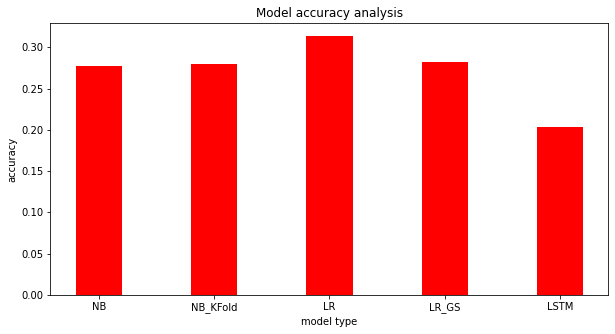

In [361]:
draw_bar_graph(mdl_lst, acc_lst, 'red', 'model type', 'accuracy', 'Model accuracy analysis')